#### In this notebook, I'm going to create a machine learning regression model to predict diamonds price and maximize it's accuracy.

## 1. Importing libraries and dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('diamonds.csv')

In [3]:
diamonds.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

#### Prior to our analysis, I need to understand what are the different attributes of diamons and what they means

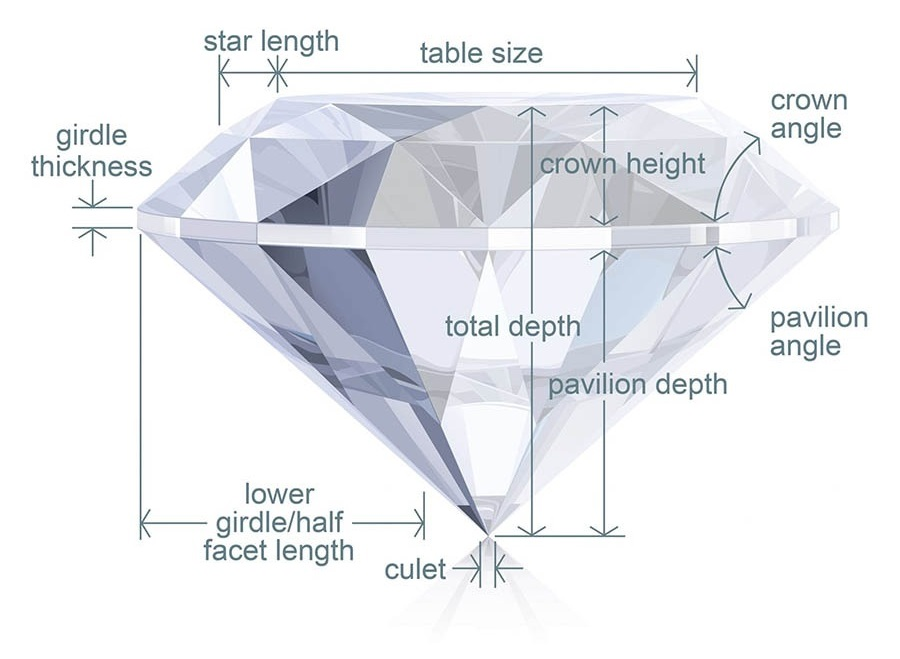

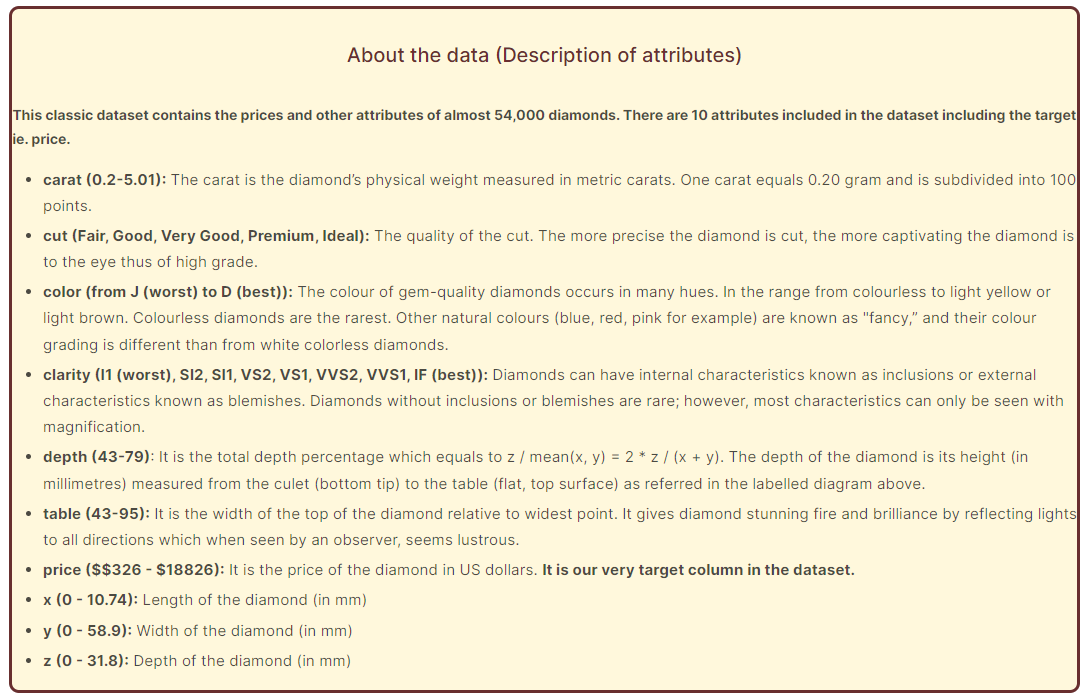

In [4]:
from IPython.display import Image, display
ImageNames = ['diamond_parts.jpg','Diamond_attributes_description.png']

for imageName in ImageNames:
    display(Image(filename=imageName))

#### In order to clarify the analysis, some feature names will be changed later

## 2. Data exploration

In [5]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Unnamed: 0' columns meaning isn't specified, so it's going to be dropped out of the dataset.
diamonds = diamonds.drop(['Unnamed: 0'], axis = 1)

In [7]:
diamonds.shape

(53940, 10)

In [8]:
# Now, I'm going to change columns names to make them easier to understand
new_names = ['weight', 'cut_quality', 'color', 'clarity', 'depth_pct', 'table', 'price', 'length', 'width', 'depth']
diamonds.columns = new_names

In [9]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weight       53940 non-null  float64
 1   cut_quality  53940 non-null  object 
 2   color        53940 non-null  object 
 3   clarity      53940 non-null  object 
 4   depth_pct    53940 non-null  float64
 5   table        53940 non-null  float64
 6   price        53940 non-null  int64  
 7   length       53940 non-null  float64
 8   width        53940 non-null  float64
 9   depth        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
# Datatype of features 'cut', 'color' & 'clarity' is "object" which needs to be converted 
# into numerical variable (will be done in data preprocessing) before we feed the data to algorithms

In [11]:
diamonds.describe()

,weight,depth_pct,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
# As price is our target variable, I'm going to plot some features relationship with it for better dataset understanding. 

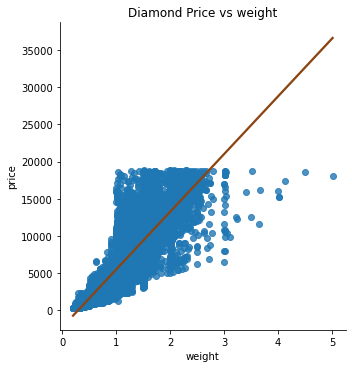

In [13]:
sns.lmplot(data=diamonds, x = 'weight', y='price', line_kws={"color": "#8B4513"})
plt.title('Diamond Price vs weight')
plt.show()

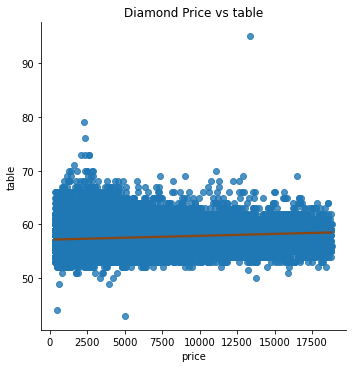

In [14]:
sns.lmplot(data=diamonds, x = 'price', y='table', line_kws={"color": "#8B4513"})
plt.title('Diamond Price vs table')
plt.show()

In [15]:
# The plot show a very poor relationship between diamonds price and its weight(carat).

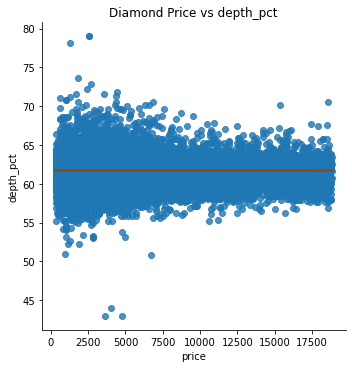

In [16]:
sns.lmplot(data=diamonds, x = 'price', y='depth_pct', line_kws={"color": "#8B4513"})
plt.title('Diamond Price vs depth_pct')
plt.show()

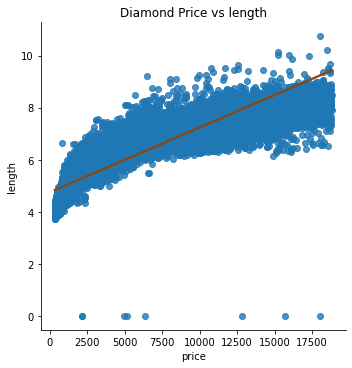

In [17]:
sns.lmplot(data=diamonds, x = 'price', y='length', line_kws={"color": "#8B4513"})
plt.title('Diamond Price vs length')
plt.show()

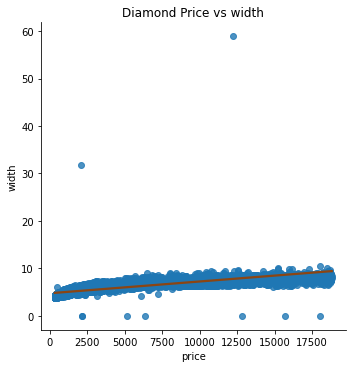

In [18]:
sns.lmplot(data=diamonds, x = 'price', y='width', line_kws={"color": "#8B4513"})
plt.title('Diamond Price vs width')
plt.show()

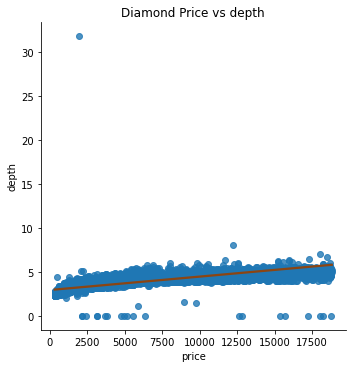

In [19]:
sns.lmplot(data=diamonds, x = 'price', y='depth', line_kws={"color": "#8B4513"})
plt.title('Diamond Price vs depth')
plt.show()

In [20]:
# Previous plot let's us see the outliers present within each dataset. We can also see that the strongest positive relationship
# exist only between price and diamond weight and length. There is also a poor positive relationship between diamond price and it's
# width and depth. There is almost no relationship between diamond price and it's table and depth_pct.

In [21]:
# As length, width and depth must be greater than 0, I will remove all those observation with 0 as minimun value.
diamonds = diamonds.drop(diamonds[diamonds['length']==0].index)
diamonds = diamonds.drop(diamonds[diamonds['width']==0].index)
diamonds = diamonds.drop(diamonds[diamonds['depth']==0].index)

In [22]:
# Dropping outliers
diamonds = diamonds[(diamonds["depth_pct"]<75)&(diamonds["depth_pct"]>45)]
diamonds = diamonds[(diamonds["table"]<80)&(diamonds["table"]>40)]
diamonds = diamonds[(diamonds["length"]<40)]
diamonds = diamonds[(diamonds["width"]<40)]
diamonds = diamonds[(diamonds["depth"]<40)&(diamonds["depth"]>2)]

## 3. Regression model building

In [23]:
# We can noew create the ML regression model to predict diamonds price. As we have 3 categorical features (cut_quality, clarity
# and color), I must encode them first.

In [24]:
diamonds1 = diamonds.copy()

from sklearn.preprocessing import LabelEncoder
categoricals = ['cut_quality', 'color', 'clarity']
encoder = LabelEncoder()

for col in categoricals:
    diamonds1[col] = encoder.fit_transform(diamonds1[col])

diamonds1.describe()

,weight,cut_quality,color,clarity,depth_pct,table,price,length,width,depth
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


<AxesSubplot:>

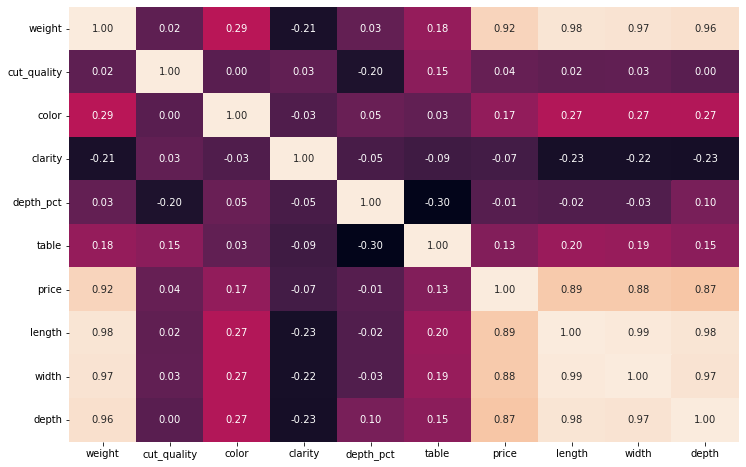

In [25]:
# Examining correlation matrix using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(diamonds1.corr(), annot=True, fmt = '.2f', cbar=False)

In [26]:
## Categorical features (cut_quality, color and clarity) have low correlation with price.

In [27]:
from sklearn.model_selection import train_test_split

y = diamonds1['price']
X = diamonds1.drop(['price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [28]:
# Building pipelins of standard scaler and model for varios regressors.

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor



pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dtr",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rfr",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("knr",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=25)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1379.901771 


C:\Users\cim_3\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1313405994.3830338, tolerance: 65462905.51017498
  model = cd_fast.enet_coordinate_descent(
C:\Users\cim_3\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1689834795.8956451, tolerance: 65427602.681324676
  model = cd_fast.enet_coordinate_descent(


Lasso: 1360.969232 
DecisionTree: 741.013205 
RandomForest: 543.931564 
KNeighbors: 811.486491 
XGBRegressor: 544.950176 


In [30]:
# XGBRegressor has the minumun RMSE, so I will create the prediction model based on it. 
pred = pipeline_xgb.predict(X_test)

In [31]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9829123699287527
Adjusted R^2: 0.982898093223346
MAE: 273.8639213294537
MSE: 278943.1120199291
RMSE: 528.1506527686291


### We got 98.28% accuracy with it. We can take the model into production. 

In [32]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [33]:
import shap

In [34]:
model = XGBRegressor(n_estimators=1000, tree_method="gpu_hist").fit(
    X_train, y_train)

xgb_explainer = shap.TreeExplainer(
    model, X_train, feature_names=X_train.columns.tolist())

In [35]:
xgb_explainer

In [36]:
# Shap values with tree explainer
#shap_values = xgb_explainer.shap_values(X_train, y_train)

In [37]:
#shap_values.shape

In [41]:
import xgboost as xgb

booster_xgb = model.get_booster()
shap_values_xgb = booster_xgb.predict(xgb.DMatrix(X_train, y_train), pred_contribs=True)

In [45]:
shap_values_xgb.shape

(43127, 10)

In [46]:
shap_values_xgb = shap_values_xgb[:, :-1]
pd.DataFrame(shap_values_xgb, columns=X_train.columns.tolist()).head()


,weight,cut_quality,color,clarity,depth_pct,table,length,width,depth
0,6206.586914,70.123695,-474.255035,-1096.647705,-68.602859,-231.792664,-592.020691,5979.936035,147.776962
1,5760.103516,-62.576885,1166.310791,1132.144775,310.713593,-111.699692,-224.604095,5350.942871,333.025055
2,-1058.359253,-74.150963,193.853287,-682.272522,-97.516418,-2.821799,138.299713,-1048.301025,-112.154594
3,-1661.251221,-10.702236,180.145798,-218.671005,-0.212849,-14.859735,-52.895264,-1240.804321,-182.199646
4,3746.532471,-18.535547,-1596.115234,766.373474,-436.049744,-166.030411,-95.205818,1851.794678,320.811310


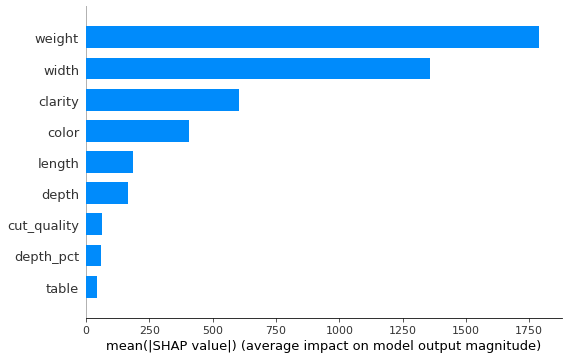

In [47]:
shap.summary_plot(
    shap_values_xgb, X_train, feature_names=X_train.columns, plot_type="bar"
)

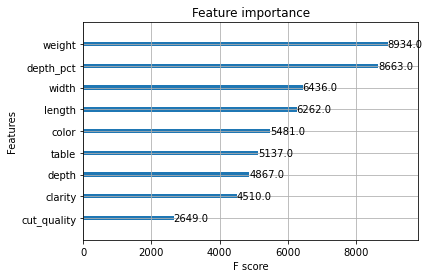

In [49]:
xgb.plot_importance(booster_xgb);

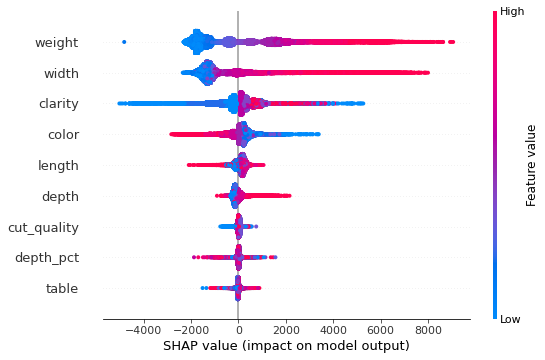

In [50]:
shap.summary_plot(shap_values_xgb, X_train, feature_names=X_train.columns)

In [ ]:
# We see that as carat increases, its effect on the model is more positive. 
# The same is true for width feature. The lenght and depth features are a bit tricky with a cluster of mixed points around the center.

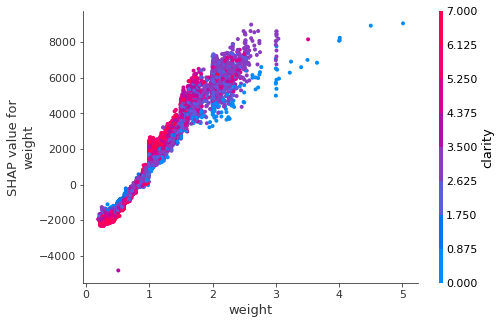

In [53]:
shap.dependence_plot("weight", shap_values_xgb, X_train, interaction_index="auto")

In [55]:
shap_explainer_values = xgb_explainer(X_train, y_train)

100%|===================| 43111/43127 [25:00<00:00]        

In [56]:
random_idx = np.random.randint(len(X_train))
random_idx

5566

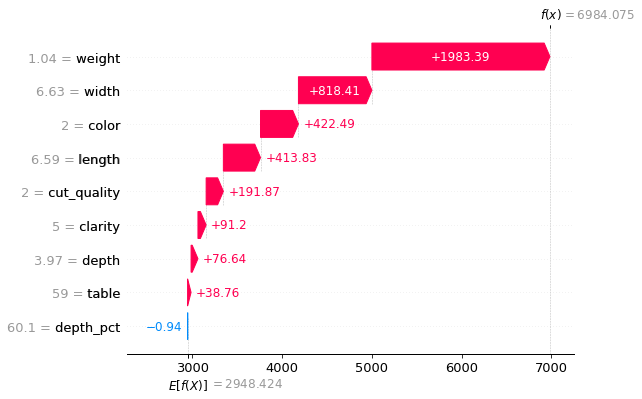

In [57]:
shap.waterfall_plot(shap_explainer_values[5566])

In [58]:
random_idx = np.random.randint(len(X_train))
random_idx

12045

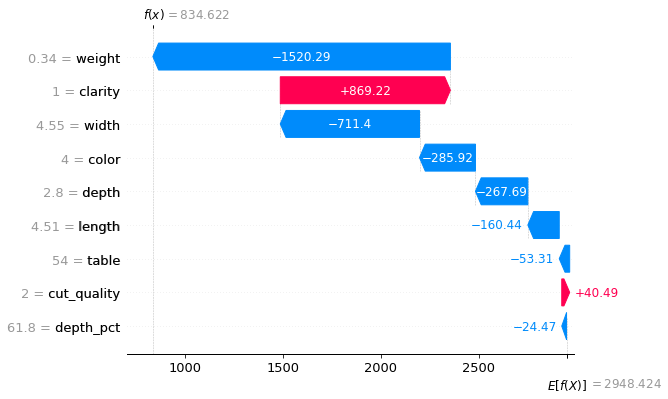

In [59]:
shap.waterfall_plot(shap_explainer_values[12045])

In [62]:
shap.initjs()  # don't forget to enable JavaScript

shap.force_plot(shap_explainer_values[12045])